In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from knn import kNN
from load_images import load_image

In [3]:
dataset_dir='lfw/lfw-deepfunneled/lfw-deepfunneled'

img_size=(64,64)
top_k=100 #LEARN ABOUT EIGENFACESSSS

In [4]:

print("Loading images...")
X,y,label_map=load_image(dataset_dir)
#X= [[image1 pixel details],[image2 pixel details],[image3 pixel details]]
#y=list of labels=[0,1,2,3,..]

print("Loaded ", X.shape[0]," images of", len(label_map), " labels(people)." )
#X.shape returns (number of images, number of features in each image)

Loading images...
Loaded  7606  images of 901  labels(people).


In [5]:

print("Centering face")
mean_face=np.mean(X, axis=0) #takes mean value for each pixel from all images 
# mean_face=[pixel1 avg value, pixel2 avg value, ... pixeln avg value]
X_centered=X-mean_face
#X_centered represents all the pixel values for each image

Centering face


In [6]:

print("Computing covariance matrix")
covariance_matrix=np.dot(X_centered,X_centered.T)
print("Computing eigenvalues and eigenvectors")
eigenvalues, eigenvectors=np.linalg.eigh(covariance_matrix)
print(f"{len(eigenvectors)} Eigenvectors identified")
print(f"Calculating top {top_k} eigenfaces")
eigenvalues_sorted_indices=np.argsort(eigenvalues)[::-1]
eigenvectors=eigenvectors[:,eigenvalues_sorted_indices[:top_k]]

Computing covariance matrix
Computing eigenvalues and eigenvectors
7606 Eigenvectors identified
Calculating top 100 eigenfaces


In [7]:
eigenfaces=np.dot(X_centered.T,eigenvectors) #representing eigenvectors in terms of pixels(eigenfaces)
#normalizing eigenface
print("Normalizing eigenfaces")
eigenfaces=eigenfaces/np.linalg.norm(eigenfaces, axis=0) #normalizing each eigenface
#projecting X_centered along the new eigenface
print("Projecting data into new space of eigenface")
X_projected=np.dot(X_centered,eigenfaces)

Normalizing eigenfaces
Projecting data into new space of eigenface


In [11]:
print("Splitting data into train and test set")
X_train, X_test, y_train, y_test=train_test_split(X_projected, y, train_size=0.75, random_state=62)

print("Predicting using kNN")
y_predictions=kNN(X_train,y_train,X_test)
accuracy=np.mean(y_predictions==y_test) #calculates the percentage of correct predictions made
print("Accuracy: ", accuracy)

Splitting data into train and test set
Predicting using kNN
Accuracy:  0.07413249211356467


Showing the top 10 eigenfaces


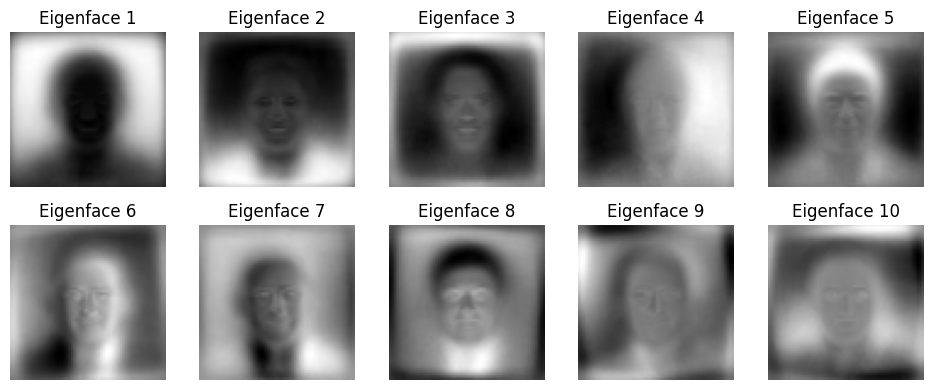

In [13]:

print("Showing the top 10 eigenfaces")
plt.figure(figsize=(10,4))
for i in range(10):    #showing the top10 eigenfaces
    #creating a subplot for each image, so that we can view them together
    #creates a 2 row, 5 column grid, and positioning goes from 1 to 10
    plt.subplot(2,5,i+1) 
    #returns the ith eigenface. [:,i] ":" means all rows, "i": means ith column
    #converts the 1D representation of image back to 2d
    face=eigenfaces[:,i].reshape(img_size)
    plt.imshow(face,cmap='gray')
    plt.title(f"Eigenface {i+1}")

    plt.axis('off')
    plt.tight_layout()


plt.show()